# Analyze Errors in Log Files

In [38]:
import re
import os
import numpy as np
import pandas as pd
from collections import defaultdict
from human_eval.data import stream_jsonl, write_jsonl
from collections import Counter
import matplotlib.pyplot as plt
#from helpers import get_code_in_fences, clean_code, clean_code_light, read_problems

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [2]:
models = [
    'phixtral-2x2_8',
    'Nous-Hermes-2-Solar-10.7B',
    'Meta-Llama-3.1-8B-Instruct',
    'codegemma-7b-it',
    'deepseek-coder-6.7b-instruct',
    'OpenCodeInterpreter-DS-6.7B',
    'Artigenz-Coder-DS-6.7B',
    'CodeQwen1.5-7B-Chat',
    'Nxcode-CQ-7B-orpo',
    'phixtral-4x2_8',
    'mistral_3b',
    'mistral_8B',
    'nemo',
    'codestral_mamba',
    'mistral_7b',
    ]
print(len(models))
dataset_names = ['HumanEval', 'MBPP', 'LBPP', 'BigCode']
wdir = '/Users/andrew/Documents/01_documents/GWU_DENG/SEAS_8588_Praxis/2_Code/logs_results/final-round-one-model/'

15


In [7]:
# group files by dataset
filepaths_per_dataset = defaultdict(list)
for dataset_name in dataset_names:
    wdir_current = wdir + dataset_name
    for root, dirs, files in os.walk(wdir_current):
        for filename in files:
            if filename.endswith('cleaned_fully.jsonl_results.jsonl'):
                if not 'prompt_basic' in filename:
                    continue
                filepath = os.path.join(root, filename)
                filepaths_per_dataset[ dataset_name ].append( filepath )

# print number of models for each dataset
for dataset_name in filepaths_per_dataset:
    print(dataset_name)
    print(len(filepaths_per_dataset[dataset_name]))

HumanEval
15
MBPP
15
LBPP
15
BigCode
15


# EDA

In [14]:
# explore structure
file0 = filepaths_per_dataset['HumanEval'][0]
file0

'/Users/andrew/Documents/01_documents/GWU_DENG/SEAS_8588_Praxis/2_Code/logs_results/final-round-one-model/HumanEval/mistral_codestral/HumanEval_codestral_mamba_complete_code_prompt_basic_temperature1.0_topP1.0_completions_20250330_050939_7966_cleaned_fully.jsonl_results.jsonl'

In [15]:
df = pd.read_json(file0, lines=True)

In [17]:
temp = df[ df['result']!='passed']
print(temp.shape)
temp.head(50)

(39, 4)


,task_id,completion,result,passed
18,HumanEval/18,from typing import *\n\ndef how_many_times(str...,failed (exception): . Traceback: Traceback (mo...,False
19,HumanEval/19,from typing import List\nfrom typing import Li...,failed (exception): '' is not in list. Traceba...,False
32,HumanEval/32,from typing import *\nimport math\nimport math...,failed (exception): . Traceback: Traceback (mo...,False
50,HumanEval/50,from typing import *\n\ndef decode_shift(s: st...,failed (exception): name 'encode_shift' is not...,False
55,HumanEval/55,from typing import *\n\ndef fib(n: int):\n ...,failed (exception): . Traceback: Traceback (mo...,False
61,HumanEval/61,from typing import *\n\ndef correct_bracketing...,"failed (exception): invalid syntax (<string>, ...",False
62,HumanEval/62,from typing import *\n\ndef derivative(xs: lis...,failed (exception): . Traceback: Traceback (mo...,False
65,HumanEval/65,"from typing import *\n\ndef circular_shift(x, ...",failed (exception): . Traceback: Traceback (mo...,False
68,HumanEval/68,from typing import *\n\ndef pluck(arr):\n e...,failed (exception): Error. Traceback: Tracebac...,False
77,HumanEval/77,from typing import *\n\ndef iscube(a):\n if...,failed (exception): Fourth test error: False. ...,False


In [19]:
for row in temp.values:
    print(row[0])
    print('-'*100, sep='')
    print(row[1])
    print('-'*100, sep='')
    print(row[2])
    print('-'*100, sep='')
    print(row[3])
    print('\n', '='*100, '\n', sep='')

HumanEval/18
----------------------------------------------------------------------------------------------------
from typing import *

def how_many_times(string: str, substring: str) -> int:
    """ Find how many times a given substring can be found in the original string. Count overlaping cases.
    >>> how_many_times('', 'a')
    0
    >>> how_many_times('aaa', 'a')
    3
    >>> how_many_times('aaaa', 'aa')
    3
    """
    return string.count(substring)
----------------------------------------------------------------------------------------------------
failed (exception): . Traceback: Traceback (most recent call last):
  File "/Users/andrew/Documents/04_git/human-eval/human_eval/execution.py", line 110, in unsafe_execute
    exec(check_program, exec_globals)
  File "<string>", line 27, in <module>
  File "<string>", line 24, in check
AssertionError

----------------------------------------------------------------------------------------------------
False


HumanEval/19
----------

In [21]:
[i.splitlines()[-1] for i in temp['result'].values]

['AssertionError',
 "ValueError: '' is not in list",
 'AssertionError',
 "NameError: name 'encode_shift' is not defined",
 'AssertionError',
 'SyntaxError: invalid syntax',
 'AssertionError',
 'AssertionError',
 'AssertionError: Error',
 'AssertionError: Fourth test error: False',
 'AssertionError',
 'IndentationError: unindent does not match any outer indentation level',
 'AssertionError: This prints if this assert fails 1 (good for debugging!)',
 'AssertionError: Test 6',
 "AttributeError: 'int' object has no attribute 'islower'",
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'AssertionError: Test 1',
 'AssertionError: Error',
 'AssertionError',
 'AssertionError',
 'AssertionError: This prints if this assert fails 7 (good for debugging!)',
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'IndexError: list index out of range',
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'AssertionError',
 'Recu

# Final Code for Error Analysis

In [34]:
# group files by dataset
errors_by_dataset = defaultdict(list)
for dataset_name in dataset_names:
    wdir_current = wdir + dataset_name
    for root, dirs, files in os.walk(wdir_current):
        for filename in files:
            if filename.endswith('cleaned_fully.jsonl_results.jsonl'):
                if not 'prompt_basic' in filename:
                    continue
                filepath = os.path.join(root, filename)
                results = list(stream_jsonl(filepath))
                                
                # get full error message which is usually the last line of the error output
                errors = [i['result'].splitlines()[-1] for i in results if i['result']!='passed']
                errors_short = [i.split(':')[0] for i in errors]    # get just the error type (part before ':')
                errors_by_dataset[ dataset_name ].extend( errors_short )

# print number of models for each dataset
for dataset_name in errors_by_dataset:
    print(dataset_name)
    print(len(errors_by_dataset[dataset_name]))

HumanEval
794
MBPP
3177
LBPP
1907
BigCode
5381


In [36]:
counts = dict()
for dataset_name, errors in errors_by_dataset.items():
    print( dataset_name )
    print(Counter(errors))
    counts[dataset_name] = Counter(errors)

HumanEval
Counter({'AssertionError': 628, 'NameError': 33, 'IndexError': 31, 'TypeError': 29, 'ValueError': 25, 'SyntaxError': 15, 'IndentationError': 10, 'AttributeError': 7, 'timed out': 6, 'RecursionError': 2, 'KeyError': 2, 'UnboundLocalError': 2, 'ZeroDivisionError': 1, 'StopIteration': 1, 'OverflowError': 1, 'ModuleNotFoundError': 1})
MBPP
Counter({'AssertionError': 2665, 'TypeError': 191, 'NameError': 159, 'IndexError': 40, 'SyntaxError': 34, 'ValueError': 34, 'timed out': 19, 'RecursionError': 9, 'KeyError': 5, 'AttributeError': 5, 'ZeroDivisionError': 4, 'IndentationError': 4, 'UnboundLocalError': 3, 'Exception': 2, 'ImportError': 1, 'OverflowError': 1, 'SystemExit': 1})
LBPP
Counter({'AssertionError': 1113, 'TypeError': 295, 'SyntaxError': 135, 'IndentationError': 102, 'NameError': 87, 'IndexError': 49, 'timed out': 34, 'ValueError': 32, 'AttributeError': 24, 'KeyError': 22, 'UnboundLocalError': 4, 'RecursionError': 3, 'statistics.StatisticsError': 2, 'StopIteration': 1, 'Fil

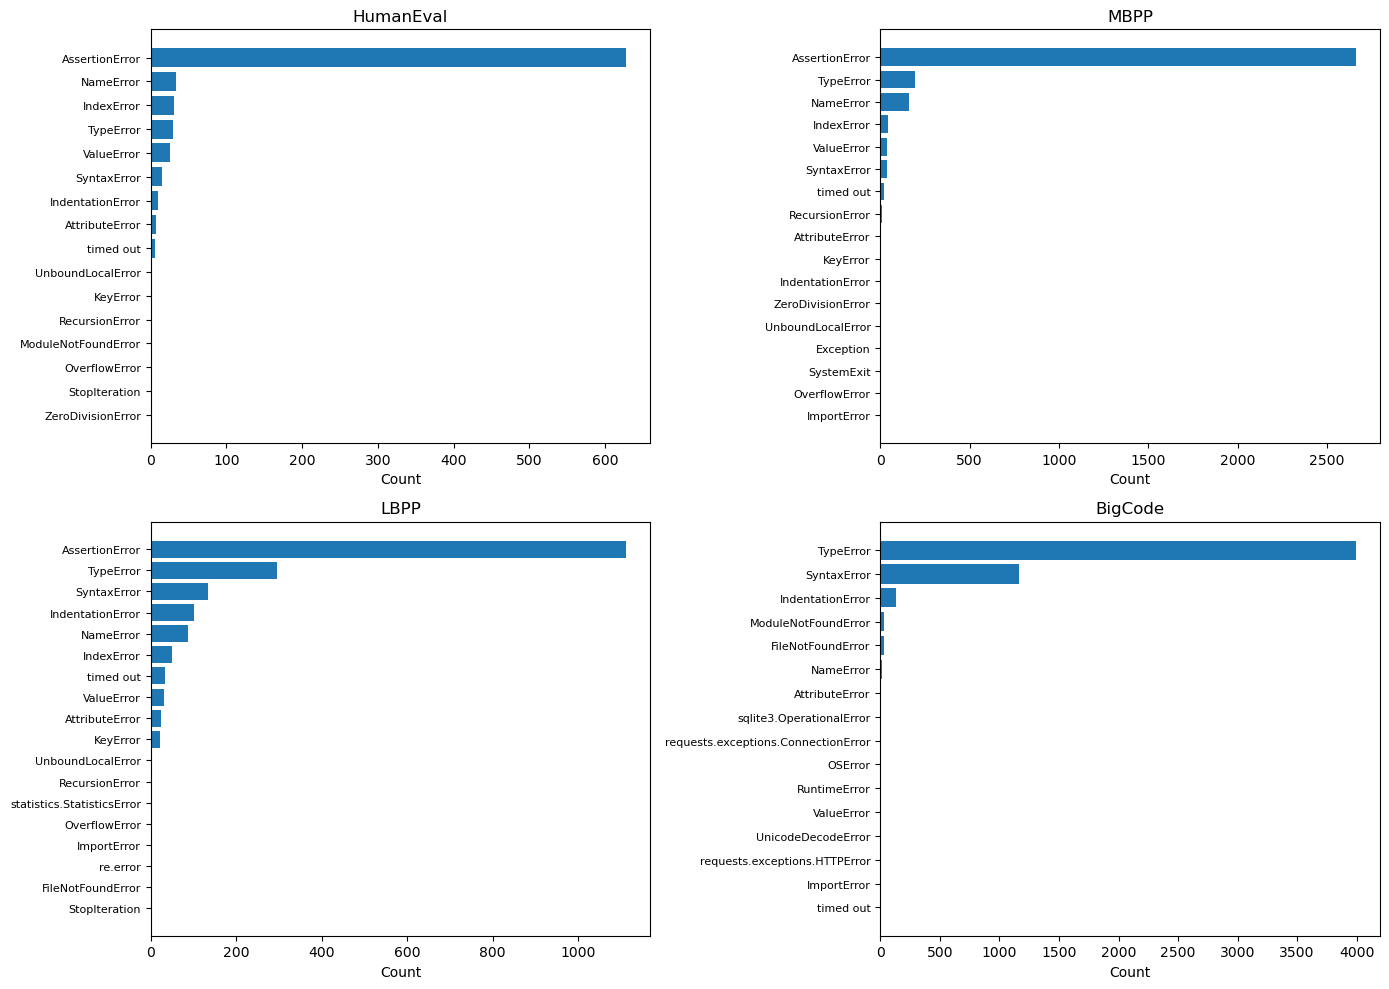

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (dataset, counter) in zip(axes.flat, counts.items()):
    # Sort items in ascending order so largest appears at the top in barh
    items = sorted(counter.items(), key=lambda x: x[1])
    labels, values = zip(*items)
    ax.barh(labels, values)
    ax.set_title(dataset)
    ax.set_xlabel('Count')
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

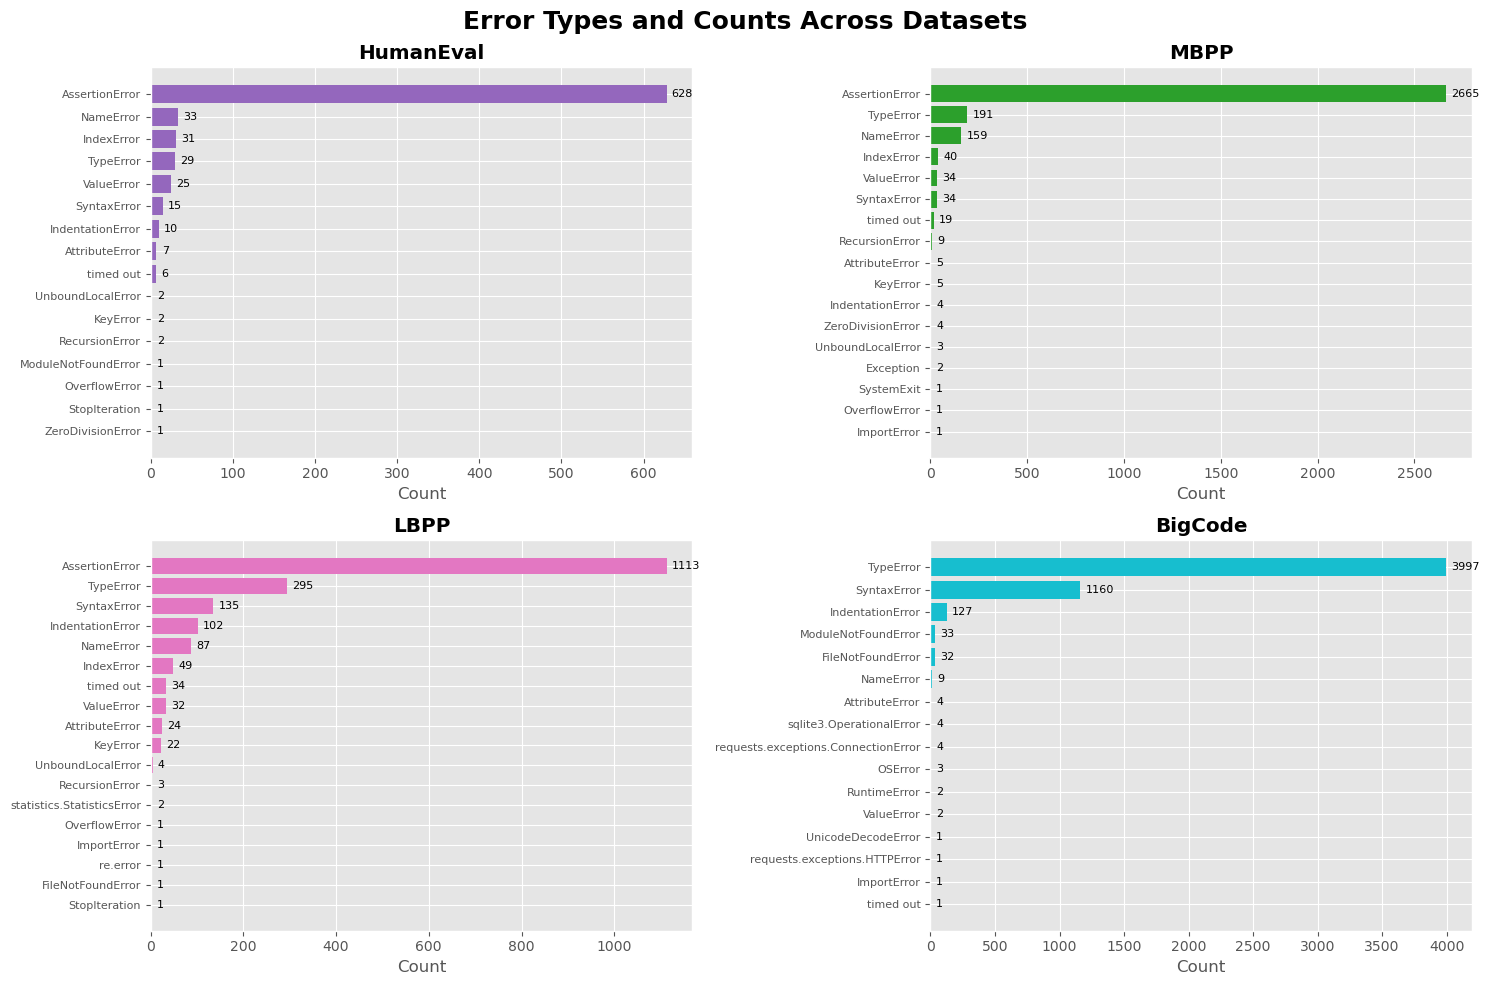

In [59]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
colors = [ 'tab:purple', 'tab:green', 'tab:pink', 'tab:cyan']

for ax, (dataset, counter), color in zip(axes.flat, counts.items(), colors):
    # Sort items ascending so highest values at top in barh
    items = sorted(counter.items(), key=lambda x: x[1])
    labels, values = zip(*items)
    bars = ax.barh(labels, values, color=color)
    
    # Annotate counts to the right of each bar
    for bar in bars:
        width = bar.get_width()
        ax.text(width + max(values)*0.01,  # slight offset to the right
                bar.get_y() + bar.get_height() / 2,
                f'{int(width)}',
                va='center', ha='left', fontsize=8)
    
    ax.set_title(dataset, fontweight='bold')
    ax.set_xlabel('Count')
    ax.tick_params(axis='y', labelsize=8)

# add one common title
fig.suptitle("Error Types and Counts Across Datasets", fontsize=18, fontweight='bold')

# make room for that supertitle
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()